# Метод главных компонент

## Programming assignment

Разбито на две части: 
- работа с модельными данными,
- работа с реальными данными.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

## Теория

Любой набор данных представляет собой матрицу $X$.

Метод главных компонент последовательно находит следующие линейные комбинации признаков (компоненты) из $X$:
- каждая компонента ортогональна всем остальным и нормированна: $<w_i, w_j> = 0, \quad ||w_i||=1$,
- каждая компонента описывает максимально возможную дисперсию данных (с учётом предыдущего ограничения).

Предположения, в рамках которых данный подход будет работать хорошо:
- линейность компонент: мы предполагаем, что данные можно анализировать линейными методами,
- большие дисперсии важны: предполагается, что наиболее важны те направления в данных, вдоль которых они имеют наибольшую дисперсию,
- все компоненты ортогональны: это предположение позволяет проводить анализ главных компонент при помощи техник линейной алгебры (например, сингулярное разложение матрицы $X$ или спектральное разложение матрицы $X^TX$).

Как это выглядит математически?

Обозначим следующим образом выборочную матрицу ковариации данных: $\hat{C} \propto Q = X^TX$. ($Q$ отличается от $\hat{C}$ нормировкой на число объектов).

Сингулярное разложение матрицы $Q$ выглядит следующим образом:

$$Q = X^TX = W \Lambda W^T$$

Можно строго показать, что столбцы матрицы $W$ являются главными компонентами матрицы $X$, т.е. комбинациями признаков, удовлетворяющих двум условиям, указанным в начале. При этом дисперсия данных вдоль направления, заданного каждой компонентой, равна соответствующему значению диагональной матрицы $\Lambda$.

Как же на основании этого преобразования производить уменьшение размерности? Мы можем отранжировать компоненты, используя значения дисперсий данных вдоль них.

Сделаем это: $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$.

Тогда, если мы выберем компоненты, соответствующие первым $d$ дисперсиям из этого списка, мы получим набор из $d$ новых признаков, которые наилучшим образом описывают дисперсию изначального набора данных среди всех других возможных линейных комбинаций исходных признаков матрицы $X$. 
- Если $d=D$, то мы вообще не теряем никакой информации.
- Если $d<D$, то мы теряем информацию, которая, при справедливости указанных выше предположений, будет пропорциональна сумме дисперсий отброшенных компонент.

Получается, что метод главных компонент позволяет нам ранжировать полученные компоненты по "значимости", а также запустить процесс их отбора.

## Пример

Рассмотрим набор данных, который сэмплирован из многомерного нормального распределения с матрицей ковариации $C = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$.

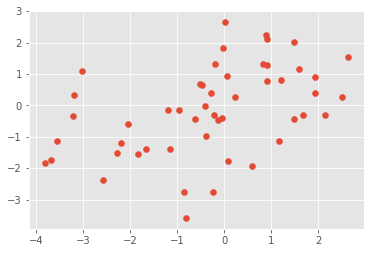

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

Путём диагонализации истинной матрицы ковариаций $C$, мы можем найти преобразование исходного набора данных, компоненты которого наилучшим образом будут описывать дисперсию, с учётом их ортогональности друг другу:

In [3]:
# тест для Cov = X.T * X
data1 = np.random.multivariate_normal(mu, C, size=1000)
data1.T.dot(data1)/1000

array([[ 3.01161924,  1.06000202],
       [ 1.06000202,  2.05999793]])

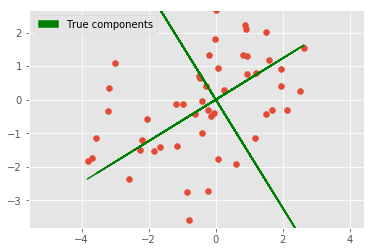

In [4]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

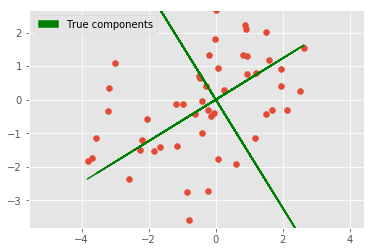

In [5]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
'''другая версия построения направляющих прямых через вектора, более каноническая с точки зрения линейной алгебры'''
plt.plot(data[:,0], (W_true[1,0]/W_true[0,0])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,1]/W_true[0,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [6]:
print 'v =', v,'\n'*2, 'W_true =','\n', W_true, \
'\n\nW_true[1,0] =', W_true[1,0], ', W_true[1,1] =', W_true[1,1]
print '\n', limits

v = [ 3.61803399  1.38196601] 

W_true = 
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]] 

W_true[1,0] = 0.525731112119 , W_true[1,1] = 0.850650808352

[-3.8232288423077048, 2.6635986058373584]


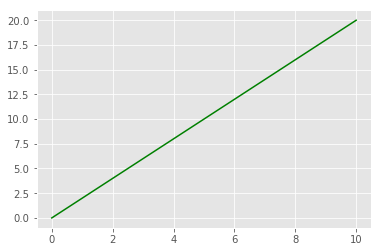

In [7]:
# тест осей
X = np.arange(11)
plt.plot(X, 2*X, color="g")

А теперь сравним эти направления с направлениями, которые выбирает метод главных компонент:

In [8]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], (W_pca[1,0]/W_pca[0,0])*data[:,0], color="c")
    plt.plot(data[:,0], (W_pca[1,1]/W_pca[0,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

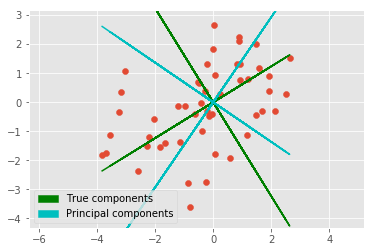

In [9]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

In [10]:
model.components_

array([[-0.82598571, -0.56369106],
       [ 0.56369106, -0.82598571]])

In [11]:
model.explained_variance_

array([ 3.5459681 ,  1.25445295])

Видно, что уже при небольшом количестве данных они отличаются незначительно. Увеличим размер выборки:

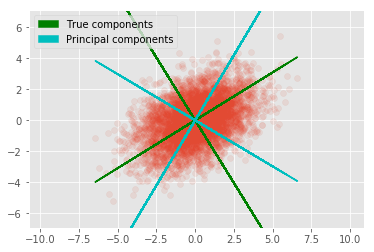

In [12]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

В этом случае главные компоненты значительно точнее приближают истинные направления данных, вдоль которых наблюдается наибольшая дисперсия.

## Статистический взгляд на модель

Как формализовать предположения метода, указанные выше? При помощи вероятностной модели!

Задача, стоящая за любым методом уменьшения размерности: получить из набора зашумлённых признаков $X$ истинные значения $Y$, которые на самом деле определяют набор данных (т.е. сведение датасета с большим количеством признаков к данным, имеющим т.н. "эффективную размерность").

В случае метода главных компонент мы хотим найти направления, вдоль которых максимальна дисперсия, с учётом описанных выше предположений о структуре данных и компонент.

Материал, описанный ниже в данной секции, не обязателен для ознакомления для выполнения следующего задания, т.к. требует некоторых знаний статистики.

В конце раздела мы получим метрику качества, которая должна определять, насколько данные хорошо описываются построенной моделью при заданном числе компонент. Отбор признаков при этом сводится к тому, что мы выбираем то количество компонент, при котором используемая метрика (логарифм правдоподобия) является максимальной.

С учётом предположений задача метода главных компонент выглядит следующим образом:

$$ x = Wy + \mu + \epsilon$$

где:
- $x$ -- наблюдаемые данные
- $W$ -- матрица главных компонент (каждый стобец -- одна компонента)
- $y$ -- их проекция на главные компоненты
- $\mu$ -- среднее наблюдаемых данных
- $\epsilon \sim \mathcal{N}(0, \sigma^2I)$ -- нормальный шум

Исходя из распределения шума, выпишем распределение на $x$, см. http://www.miketipping.com/papers/met-mppca.pdf :

$$p(x \mid y) = \mathcal{N}(Wy + \mu, \sigma^2I) $$


Введём априорное распределение на $y$:

$$p(y) = \mathcal{N}(0, 1)$$

Выведем из этого при помощи формулы Байеса маргинальное распределение на $p(x)$:

$$p(x) = \mathcal{N}(\mu, \sigma^2I + WW^T)$$

Тогда правдоподобие набора данных при условии используемой модели выглядит следующим образом:

$$\mathcal{L} = \sum_{i=1}^N \log p(x_i) = -N/2 \Big( d\log(2\pi) + \log |C| + \text{tr}(C^{-1}S) \Big)$$

где:
- $C = \sigma^2I + WW^T$ -- матрица ковариации в маргинальной модели (мм: то есть в модели с сокращенными признаками)
- $S = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)(x_i - \mu)^T$ -- выборочная ковариация

Значение $\mathcal{L}$ имеет смысл логарифма вероятности получения набора данных $X$ при условии, что он удовлетворяет предположениям модели метода главных компонент. Чем оно больше -- тем лучше модель описывает наблюдаемые данные.

## 1. Автоматическое уменьшение размерности данных при помощи логарифма правдоподобия $\mathcal{L}$

In [13]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,len(d_scores)+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
print data.shape
data[:5]

(3000, 80)


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.238399,-1.311330,-0.782298,-0.341821,0.469353,-0.431860,0.602948,1.220206,1.525103,-0.991354,...,-0.559927,-0.532534,-0.465923,0.874697,-0.108972,-0.080328,0.448971,2.080754,-1.535373,-0.460125
1,-0.223940,-1.277836,-0.202433,-0.317682,0.081900,-0.624267,-0.577119,-0.489564,0.704099,-0.511071,...,-0.055943,-2.208109,0.027813,-1.663044,0.018190,-0.432993,1.204321,0.705121,-1.106140,0.145533
2,-0.278740,1.342790,-0.734591,0.618881,1.365690,-1.397553,-1.446412,-0.844917,0.845916,-1.574979,...,-1.616313,2.144484,-1.110290,-0.524140,-2.176645,-1.903969,1.715735,0.054220,-1.125896,1.309994
3,0.585189,0.344587,1.512917,0.272105,0.480314,-0.688009,-1.473050,-0.732295,0.407361,0.900369,...,1.107443,-0.948995,0.555096,0.645465,1.291971,0.690657,-0.322088,0.341865,-1.436627,0.231027
4,0.992821,-0.654237,2.431634,-1.167275,0.347093,0.772373,0.766213,-0.441367,0.632604,1.543905,...,0.088682,1.357311,0.739249,-0.213874,0.521273,-0.885125,-1.262695,0.974920,1.139357,-0.104045


In [15]:
data.mean(axis=0)

0     0.002160
1     0.019887
2     0.010011
3    -0.011375
4     0.028524
5    -0.023364
6     0.018873
7     0.002683
8    -0.015450
9     0.002163
10   -0.046725
11    0.006435
12   -0.025036
13   -0.023048
14    0.005009
15   -0.007105
16   -0.007687
17    0.004178
18   -0.013182
19   -0.015910
20    0.061482
21    0.006464
22    0.015117
23   -0.026180
24    0.032335
25    0.007508
26   -0.021174
27   -0.019674
28    0.023773
29   -0.008617
        ...   
50   -0.035993
51    0.015522
52    0.012570
53   -0.041033
54   -0.006564
55    0.030544
56    0.026238
57   -0.005989
58    0.030554
59   -0.006494
60   -0.036576
61    0.013028
62   -0.002088
63    0.005948
64   -0.010969
65   -0.029158
66   -0.019513
67    0.026702
68   -0.025684
69   -0.018487
70   -0.004091
71    0.033875
72   -0.009191
73    0.000835
74    0.021076
75   -0.050741
76    0.013179
77    0.011858
78   -0.016686
79    0.028127
dtype: float64

In [16]:
D = data.shape[1]
D

80

In [17]:
def score_n(n):
    model = PCA(n_components=n, svd_solver='full')
    return cv_score(model, data).mean()
scores = [score_n(n) for n in range(1, D+1)]

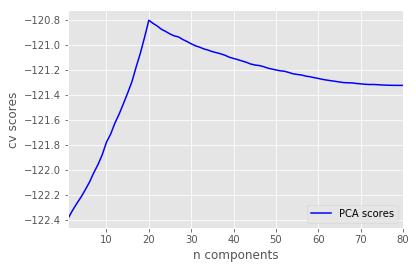

In [18]:
plot_scores(scores)

In [19]:
optimal_d = np.argmax(scores) + 1
write_answer_1(optimal_d)
optimal_d

20

## Вариационный взгляд на модель

Мы знаем, что каждой главной компоненте соответствует описываемая ей дисперсия данных (дисперсия данных при проекции на эту компоненту). Она численно равна значению диагональных элементов матрицы $\Lambda$, получаемой из спектрального разложения матрицы ковариации данных (смотри теорию выше).

Исходя из этого, мы можем отсортировать дисперсию данных вдоль этих компонент по убыванию, и уменьшить размерность данных, отбросив $q$ итоговых главных компонент, имеющих наименьшую дисперсию.

Делать это можно двумя разными способами. Например, если вы вдальнейшем обучаете на данных с уменьшенной размерностью модель классификации или регрессии, то можно запустить итерационный процесс: удалять компоненты с наименьшей дисперсией по одной, пока качество итоговой модели не станет значительно хуже.

Более общий способ отбора признаков заключается в том, что вы можете посмотреть на разности в дисперсиях в отсортированном ряде $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$: $\lambda_{(1)}-\lambda_{(2)}, \dots, \lambda_{(D-1)} - \lambda_{(D)}$, и удалить те компоненты, на которых разность будет наибольшей. Именно этим методом вам и предлагается воспользоваться для тестового набора данных.

## 2. Ручное уменьшение размерности признаков посредством анализа дисперсии данных вдоль главных компонент

In [20]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,len(d_variances)+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

In [21]:
print data.shape
data[:5]

(3000, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.848776,-0.666596,-0.724109,-0.584370,-0.460105,1.161415,-0.153160,-2.253871,1.375337,0.561841,...,1.328021,0.615259,1.447412,1.177600,-0.643321,0.005454,-1.075457,0.636591,0.075188,-0.461723
1,0.560569,-0.493592,-0.149612,-0.262415,0.967470,-1.094108,0.815526,0.487121,1.537931,-2.168744,...,0.523245,-0.979103,2.280059,-1.413170,1.146576,-1.179831,0.569553,-0.073751,-0.841962,0.474029
2,-1.484923,-0.622672,0.305978,0.040120,-2.851857,0.092543,-0.029286,-0.624243,-1.155940,0.658744,...,0.916887,1.494340,-1.801660,0.164034,0.467053,-0.872597,0.066600,1.388963,-1.446373,-0.002239
3,-1.487085,-0.252582,-0.429568,-0.124176,-0.547003,0.942490,-0.783337,-0.994770,2.140593,-0.978872,...,-1.177229,-0.892356,-0.166295,-1.507428,1.218209,-0.769020,1.439147,0.713580,0.765335,-0.452884
4,0.462349,0.751057,0.140967,-0.006099,-0.244748,-0.075261,0.924772,0.417142,-0.985730,-1.375670,...,-1.392519,0.502969,1.538669,1.002944,-0.832352,0.990356,-1.733266,-0.201313,-0.834691,-1.118169


In [22]:
D = data.shape[1]
D

100

In [23]:
model = PCA(n_components=D)
model.fit(data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
transform = model.transform(data)

In [25]:
transform.shape

(3000L, 100L)

In [26]:
W_pca = model.components_
W_pca.shape

(100L, 100L)

In [27]:
lambdas = model.explained_variance_ 

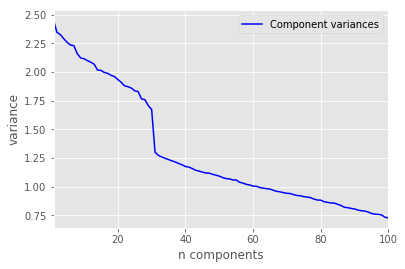

In [28]:
plot_variances(lambdas)

In [29]:
deltas = np.array([lambdas[i] - lambdas[i + 1] for i in range(len(lambdas) - 1)])

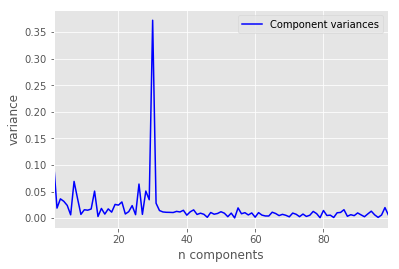

In [30]:
plot_variances(deltas)

In [31]:
deltas.max()

0.37216224685838295

In [32]:
optimal_d = deltas.argmax() + 1
optimal_d

30

In [33]:
write_answer_2(optimal_d)

## Интерпретация главных компонент

В качестве главных компонент мы получаем линейные комбинации исходных призанков, поэтому резонно возникает вопрос об их интерпретации.

Для этого существует несколько подходов, мы рассмотрим два:
- рассчитать взаимосвязи главных компонент с исходными признаками
- рассчитать вклады каждого конкретного наблюдения в главные компоненты

Первый способ подходит в том случае, когда все объекты из набора данных не несут для нас никакой семантической информации, которая уже не запечатлена в наборе признаков.

Второй способ подходит для случая, когда данные имеют более сложную структуру. Например, лица для человека несут больший семантический смысл, чем вектор значений пикселей, которые анализирует PCA.

Рассмотрим подробнее способ 1: он заключается в подсчёте коэффициентов корреляций между исходными признаками и набором главных компонент.

Так как метод главных компонент является линейным, то предлагается для анализа использовать корреляцию Пирсона, выборочный аналог которой имеет следующую формулу:

$$r_{jk} = \frac{\sum_{i=1}^N (x_{ij} - \bar{x}_j) (y_{ik} - \bar{y}_k)}{\sqrt{\sum_{i=1}^N (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^N (y_{ik} - \bar{y}_k)^2}} $$

где:
- $\bar{x}_j$ -- среднее значение j-го признака,
- $\bar{y}_k$ -- среднее значение проекции на k-ю главную компоненту.

Корреляция Пирсона является мерой линейной зависимости. Она равна 0 в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы. Исходя из степени корреляции новой компоненты с исходными признаками, можно строить её семантическую интерпретацию, т.к. смысл исходных признаков мы знаем.

## 3. Анализ главных компонент при помощи корреляций с исходными признаками.

In [34]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# place your code here

In [35]:
print data.shape
print target
print target_names
data[:5]

(150L, 4L)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [36]:
D = data.shape[1]
model = PCA(n_components=D)
model.fit(data)

PCA(copy=True, iterated_power='auto', n_components=4L, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
transformed_data = model.transform(data)

In [38]:
print transformed_data.shape
transformed_data[:5]

(150L, 4L)


array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02]])

In [39]:
# тест 1 - как выбираются элементы
transformed_data[target == 0, 0]

array([-2.68420713, -2.71539062, -2.88981954, -2.7464372 , -2.72859298,
       -2.27989736, -2.82089068, -2.62648199, -2.88795857, -2.67384469,
       -2.50652679, -2.61314272, -2.78743398, -3.22520045, -2.64354322,
       -2.38386932, -2.6225262 , -2.64832273, -2.19907796, -2.58734619,
       -2.3105317 , -2.54323491, -3.21585769, -2.30312854, -2.35617109,
       -2.50791723, -2.469056  , -2.56239095, -2.63982127, -2.63284791,
       -2.58846205, -2.41007734, -2.64763667, -2.59715948, -2.67384469,
       -2.86699985, -2.62522846, -2.67384469, -2.98184266, -2.59032303,
       -2.77013891, -2.85221108, -2.99829644, -2.4055141 , -2.20883295,
       -2.71566519, -2.53757337, -2.8403213 , -2.54268576, -2.70391231])

In [40]:
# тест 2 - маска для выбора элементов
target == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

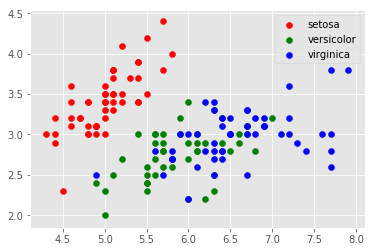

In [41]:
# визуализация ИСХОДНЫХ данных
plot_iris(data, target, target_names)

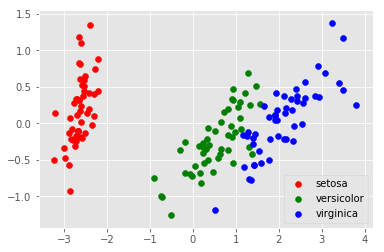

In [42]:
# визуализация ПРЕОБРАЗОВАННЫХ данных
plot_iris(transformed_data, target, target_names)

In [43]:
from scipy.stats.stats import pearsonr

In [44]:
# библиотечная реализация корреляции Пирсона
pearsonr(data[:, 0], transformed_data[:, 0])

(0.89754488494076134, 1.6905400604172694e-54)

In [45]:
# моя реализация корреляции Пирсона
def corr_pearson(X, Y):
    X_mean = X.mean()
    Y_mean = Y.mean()
    return sum([(X[i] - X_mean) * (Y[i] - Y_mean) for i in range(len(X))]) / \
              np.sqrt(sum([(X[i] - X_mean) * (X[i] - X_mean) for i in range(len(X))]) * \
                      sum([(Y[i] - Y_mean) * (Y[i] - Y_mean) for i in range(len(X))]))

In [46]:
%%time
# сравним корреляцию с библиотечной
corr_pearson(data[:, 0], transformed_data[:, 0])

Wall time: 0 ns


0.89754488494076123

In [47]:
corr_0 = [corr_pearson(data[:, i], transformed_data[:, 0]) for i in range(data.shape[1])]
corr_0

[0.89754488494076123,
 -0.38999337904750558,
 0.99785405063545973,
 0.96648418315379236]

In [48]:
corr_1 = [corr_pearson(data[:, i], transformed_data[:, 1]) for i in range(data.shape[1])]
corr_1

[0.39023141074016615,
 0.82831259288328818,
 -0.049030056338978216,
 -0.048180169740076516]

In [49]:
# массив корреляций признаков: 0 - max с первой проекцией, 1 - max со второй проекцией
corr_max = np.array([np.argmax([abs(corr_0[i]), abs(corr_1[i])]) for i in range(len(corr_0))])
corr_max

array([0, 1, 0, 0], dtype=int64)

In [50]:
# 1-й вариант формирования списков
list_pc1 = []
list_pc2 = []
for i in range(len(corr_0)):
    if np.argmax([abs(corr_0[i]), abs(corr_1[i])])==0:
        list_pc1.append(i + 1)
    else:
        list_pc2.append(i + 1)

print list_pc1, list_pc2

[1, 3, 4] [2]


In [51]:
# 2-й вариант формирования списков. Этот вариант мне нравится больше
ind_template = np.arange(len(corr_max)) + 1
list_pc1 = ind_template[corr_max==0]
list_pc2 = ind_template[corr_max==1]
print list_pc1, list_pc2

[1 3 4] [2]


In [52]:
write_answer_3(list_pc1, list_pc2)